In [10]:
import numpy as np
import pandas as pandas
from mglearn import datasets 
from matplotlib import pyplot as plt

# 선형 회귀 
# 두 데이타 간의 상관관계를 조사해서 이것에 대한 선형식을 구하고 이 식을 예측의 도구로 활용
# y = ax + b
# 최소제곱법 : ordinary least squares OLS
# 예측값과 훈련셋에 있는 y 사이의 평균제곱 오차를 최소화하는 절편과 기울기를 찾는 알고리즘
# 평균제곱오차는 예측값과 y 사이의 차이를 제곱하고 더한 후 데이터 건수로 나눈 수


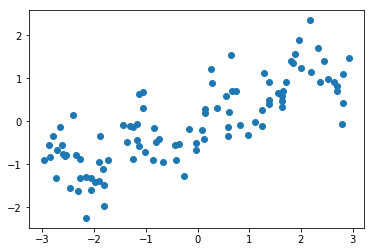

In [11]:
data, target = mglearn.datasets.make_wave(n_samples=100)
plt.plot(data, target, 'o')
plt.show()

w[0]: 0.393906  b: -0.031804


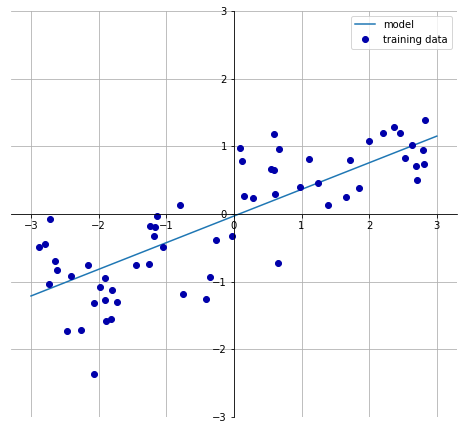

In [12]:
# 선형회귀 그래프
mglearn.plots.plot_linear_regression_wave()
plt.show()

In [22]:
# 회귀를 위한 선형 모델 생성

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state= 0)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)   # 선형모텔 생성을 위한 훈련 실시

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
print('기울기', lr.coef_)  # 가증치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', lr.score(X_train,y_train))
print('검증 측정값 R^2', lr.score(X_test, y_test))


기울기 [0.39618269]
절편 0.032241940117533535
훈련 측정값 R^2 0.6055564372642455
검증 측정값 R^2 0.621210114749764


In [26]:
print('예측값 확인', lr.predict(np.array([[-0.11],[0.03]])))

예측값 확인 [-0.01133816  0.04412742]


In [27]:
# x : 피자 크기
# y : 피자 가격
X = np.array([[6],[8],[10],[14],[18]])
y = [7,9,13,17.5,18]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)


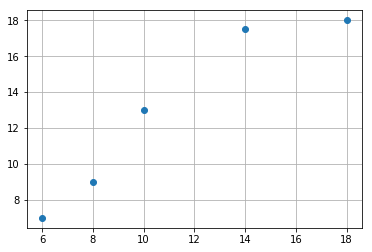

In [69]:
plt.plot(X, y, 'o')
plt.grid(True)
plt.show()

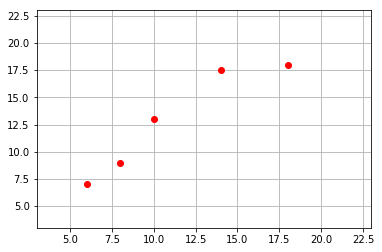

In [75]:
# 선형식 그래프 그리기
#  y= ax + b
plt.plot(X,y, 'ro')
plt.plot(X,X*lr.coef_ +lr.intercept_)
plt.axis([3,23,3,23])
plt.grid()
plt.show()

In [80]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print('기울기', lr.coef_)  # 가증치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', lr.score(X_train,y_train))
print('검증 측정값 R^2', lr.score(X_test, y_test))

기울기 [-0.00216563  0.34182187]
절편 -6.166960396529613
훈련 측정값 R^2 0.5641749348773838
검증 측정값 R^2 0.3587598137072809


In [82]:
# 에측하기
mypizza = np.array([[12]])
dollar = lr.predict(mypizza)

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
# 흡연여부와 임신주차에 따른 신생아 몸무게 예측
# 37, 흡연일 때 몸무게는?
# 40, 흡연일 때 몸무게는?

In [118]:
import pandas as pd
data = pd.read_table('c:/dataset/pregnant.txt')
print(data.head())

    Wgt  Gest Smoke
0  2940    38   yes
1  3130    38    no
2  2420    36   yes
3  2450    34    no
4  2760    39   yes


In [119]:
mapping = {'yes':1, 'no': 0}
data['Smoke'] = data['Smoke'].map(mapping)
print(data['Smoke'].head())

0    1
1    0
2    1
3    0
4    1
Name: Smoke, dtype: int64


In [120]:
X_train, X_test, y_train, y_test = train_test_split(data[['Gest','Smoke']], data['Wgt'], random_state= 0)


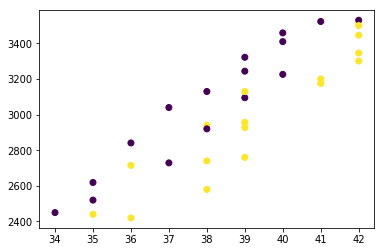

In [121]:
# 산점도 그리기
plt.scatter(data['Gest'],data['Wgt'],c=data['Smoke'])
plt.show()

In [122]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', lr.score(X_train,y_train))
print('검증 측정값 R^2', lr.score(X_test, y_test))

기울기 [ 142.58061394 -240.02253872]
절편 -2380.6375138274316
훈련 측정값 R^2 0.8823908967277116
검증 측정값 R^2 0.913020961726086


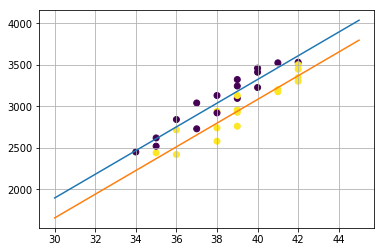

In [124]:
# 선형회귀식으로 그래프 그리기
x = np.linspace(30, 45,100)
plt.scatter(data['Gest'],data['Wgt'],c=data['Smoke'])
plt.plot(x,x*lr.coef_[0] + 0*lr.coef_[1] +lr.intercept_)  # 임신주수에 따른 회귀식
plt.plot(x,x*lr.coef_[0] + 1*lr.coef_[1] +lr.intercept_)  # 임신주수, 흡연여부에 따른 회귀식
plt.grid()
plt.show()

In [127]:
# 37주, 흡연일 때 몸무게는?
x1 = np.array([[37,1]])
# 40주, 흡연일 때 몸무게는?
x2 = np.array([[40,1]])
# 42주, 흡연일 때 몸무게는?
x3 = np.array([[42,0]])

print('32주, 흡연',lr.predict(x1))
print('40주, 흡연',lr.predict(x2))
print('42주, 흡연',lr.predict(x3))

32주, 흡연 [2654.82266316]
40주, 흡연 [3082.56450498]
42주, 흡연 [3607.74827157]


In [ ]:
# 교호작용을 이용한 선형 회귀
# 어떤 변수가 다른 변수에 의존하는 경우를 고려하는 경우
# 즉, 변수간의

In [133]:
data['weeksmoke'] = data['Gest']*data['Smoke']
lr = LinearRegression()
Xvar = ['Gest','Smoke','weeksmoke']
lr.fit(Xvar,data['Wgt'])

ValueError: Expected 2D array, got 1D array instead:
array=['Gest' 'Smoke' 'weeksmoke'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print('기울기', lr.coef_)  # 가중치 weight
print('절편', lr.intercept_)  # 편향 bias
print('훈련 측정값 R^2', lr.score(Xvar['Xvar'],data['Wgt']))


In [ ]:
# 선형회귀식 그리기
# wgt = week + smoke + (week*smoke) + a
x = np.linspace(30, 45,100)
plt.scatter(data['Gest'],data['Wgt'],c=data['Smoke'])
plt.plot(x,x*lr.coef_[0] + 0*lr.coef_[1] +lr.intercept_)  # 임신주수에 따른 회귀식
plt.plot(x,x*(lr.coef_[0] + 1*lr.coef_[2]) + 1*lr.coef_[1] +lr.intercept_)  # 임신주수, 흡연여부에 따른 회귀식
plt.grid()
plt.show()

In [ ]:
# 배달거리에 따른 배달 시간 예측
# 200km 정도 떨어진 곳에서 배달을 시키면 몇 분만에 올까?

In [83]:
baedal = pd.read_csv('c:/dataset/baedal.txt')
print(baedal.head())

   dis   time
0  100     20
1  150     24
2  300     36
3  400     47
4  130     22


In [85]:
X = baedal.iloc[:,0][:,np.newaxis]  # 배달거리 추출
     # 1 차원 데이터를 2차원 행렬로 변환 = >  a = [1,2,3,] => a[:,np.newaxis] => a = [[1],[2],[3]]
y = baedal.iloc[:,1]  # 배달시간 추출

In [86]:
lr = LinearRegression()
lr.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
print('기울기', lr.coef_)  # 가증치 weight
print('절편', lr.intercept_)  # 편향 bias


기울기 [0.09229754]
절편 11.330266325025235


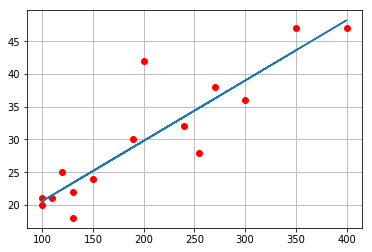

In [88]:
# 선형식 그래프 그리기
#  y= ax + b
plt.plot(X,y, 'ro')
plt.plot(X,X*lr.coef_ +lr.intercept_)
#plt.axis([3,23,3,23])
plt.grid()
plt.show()